In [1]:
import os
import random
import pandas as pd
import numpy as np
import karray as ka
import symbolx as syx
from symbolx import SymbolsHandler, Symbol, DataCollection

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt

import plotly.io as pio
pio.renderers.default = 'notebook'
from IPython.display import HTML


import supporting_functions as helpers  # noqa: E402

In [2]:
ordered_tech_color = {
'Outflow:Outflow'                      : "#000000",
'Outflow:Onshore Wind'                 : "#669aaa",
'Outflow:Offshore Wind'                : "#215968",
'Outflow:Solar Photovoltaic'           : "#ffffbb",
'Outflow:Run-of-River'                 : "#6782e4",
'Outflow:Export'                       : "#ec00ec",
'Outflow:Li-ion Battery'               : "#36c9f6",
'Outflow:Pumped Hydro Storage (closed)': "#7cbaa1",
'Outflow:PEM'                          : "#63009c",
'Outflow:Pumped Hydro Storage (open)'  : "#6ceab7",
'Outflow:Charging'                     : "#b1500f",
'Inflow:Nuclear'                       : "#ff8180",
'Inflow:Lignite'                       : "#bb8874",
'Inflow:Hard Coal'                     : "#8c7f76",
'Inflow:Fossil Fuel Other'             : "#a2b0b8",
'Inflow:Oil Fuel'                      : "#565753",
'Inflow:Bioenergy'                     : "#c2f08e",
'Inflow:V2G'                           : "#b1500f",
'Inflow:Reservoirs'                    : "#8ba1f0",
'Inflow:Import'                        : "#ec00ec",
'Inflow:Pumped Hydro Storage (closed)' : "#7cbaa1",
'Inflow:Li-ion Battery'                : "#36c9f6",
'Inflow:OCGT'                          : "#c62200",
'Inflow:CCGT'                          : "#ff814b",
'Inflow:H2_GT'                         : "#008600",
'Inflow:Pumped Hydro Storage (open)'   : "#6ceab7",
}

tech_mapping = {
'Outflow:Onshore Wind'                 : "Onshore Wind: Curtailment",
'Outflow:Offshore Wind'                : "Offshore Wind: Curtailment",
'Outflow:Solar Photovoltaic'           : "Solar Photovoltaic: Curtailment",
'Outflow:Run-of-River'                 : "Run-of-River: Curtailment",
'Outflow:Export'                       : "Export",
'Outflow:Li-ion Battery'               : "Li-ion Battery: Charge",
'Outflow:Pumped Hydro Storage (closed)': "Pumped Hydro Storage (closed): Charge",
'Outflow:PEM'                          : "PEM",
'Outflow:Pumped Hydro Storage (open)'  : "Pumped Hydro Storage (open): Charge",
'Outflow:Charging'                     : "BEV: Charge",
'Inflow:Nuclear'                       : "Nuclear",
'Inflow:Lignite'                       : "Lignite",
'Inflow:Hard Coal'                     : "Hard Coal",
'Inflow:Fossil Fuel Other'             : "Fossil Fuel Other",
'Inflow:Oil Fuel'                      : "Oil Fuel",
'Inflow:Bioenergy'                     : "Bioenergy",
'Inflow:V2G'                           : "BEV: Discharge",
'Inflow:Reservoirs'                    : "Reservoirs",
'Inflow:Import'                        : "Import",
'Inflow:Pumped Hydro Storage (closed)' : "Pumped Hydro Storage (closed): Discharge",
'Inflow:Li-ion Battery'                : "Li-ion Battery: Discharge",
'Inflow:CCGT'                          : "CCGT",
'Inflow:OCGT'                          : "OCGT",
'Inflow:H2_GT'                         : "H2_GT",
'Inflow:Pumped Hydro Storage (open)'   : "Pumped Hydro Storage (open): Discharge",
}

In [3]:
symbols_folder = os.path.join("..", "results", "data")

In [4]:
ka.settings.order = ['id', 'n', 'gen', 'sto', 'ev', 'elyh2', 'stoh2', 'reconh2', 'l', 'case', 'tech', 'h']
ka.settings.long_dtype = 'float32'
ka.settings.dense_dtype = 'float32'
ka.settings.data_type = 'dense'

save_csv = False

In [5]:
dc = DataCollection()
dc.add_collector(collector_name='feather_collector', parser=syx.symbol_parser_feather, loader=syx.load_feather)
dc.add_folder('feather_collector', symbols_folder)
dc.add_custom_attr(collector_name='feather_collector', verbose=True)
dc.adquire(id_integer=False, serializer='json', zip_extension=None)

In [6]:
SH = SymbolsHandler(method='object', obj=dc)

In [7]:
node_electricity_demand = Symbol("node_electricity_demand", symbol_handler=SH)
G = Symbol("G", symbol_handler=SH)
CU = Symbol("CU", symbol_handler=SH)
STO_IN = Symbol("STO_IN", symbol_handler=SH)
STO_OUT = Symbol("STO_OUT", symbol_handler=SH)
STO_SPILL = Symbol("STO_SPILL", symbol_handler=SH)
# STO_L = Symbol("STO_L", symbol_handler=SH)
# N_TECH = Symbol("N_TECH", symbol_handler=SH)
# N_STO_E = Symbol("N_STO_E", symbol_handler=SH)
# N_STO_P_IN = Symbol("N_STO_P_IN", symbol_handler=SH)
# N_STO_P_OUT = Symbol("N_STO_P_OUT", symbol_handler=SH)
# Z = Symbol("Z", symbol_handler=SH)
F = Symbol("F", symbol_handler=SH)
net_incidence_matrix = Symbol("net_incidence_matrix", symbol_handler=SH)
net_max_flow = Symbol("net_max_flow", symbol_handler=SH)
EV_GED = Symbol("EV_GED", symbol_handler=SH)
EV_ED = Symbol("EV_ED", symbol_handler=SH)
# EV_L = Symbol("EV_L", symbol_handler=SH)
EV_CHARGE = Symbol("EV_CHARGE", symbol_handler=SH)
EV_DISCHARGE = Symbol("EV_DISCHARGE", symbol_handler=SH)
ev_quant = Symbol("node_ev_quantity", symbol_handler=SH)
ev_share = Symbol("ev_share", symbol_handler=SH)
ev_capacity = Symbol("ev_battery_capacity", symbol_handler=SH)
ev_profile_enabled = Symbol("ev_profile_enabled", symbol_handler=SH)
ev_discharge_enabled = Symbol("ev_discharge_enabled", symbol_handler=SH)
# H2_N_ELY = Symbol("H2_N_ELY", symbol_handler=SH)
# H2_N_RECON = Symbol("H2_N_RECON", symbol_handler=SH)
# H2_N_STO_E = Symbol("H2_N_STO_E", symbol_handler=SH)
# H2_STO_L = Symbol("H2_STO_L", symbol_handler=SH)
H2_ELY_IN = Symbol("H2_ELY_IN", symbol_handler=SH)
H2_RECON_OUT = Symbol("H2_RECON_OUT", symbol_handler=SH)
H2_STO_IN = Symbol("H2_STO_IN", symbol_handler=SH)
H2_STO_OUT = Symbol("H2_STO_OUT", symbol_handler=SH)
# H2_FLOW = Symbol("H2_FLOW", symbol_handler=SH) # Not in use as h2_max_flow = 0
H2_DIR_DEM = Symbol("H2_DIR_DEM", symbol_handler=SH)
# H2_IMP = Symbol("H2_IMP", symbol_handler=SH) # Not in use as h2_max_flow = 0
# H2_INF = Symbol("H2_INF", symbol_handler=SH) # Not in use as infeas_h2_cost = -1
H2_SPILL = Symbol("H2_SPILL", symbol_handler=SH)
h2_efficiency_ely = Symbol("h2_efficiency_ely", symbol_handler=SH)
h2_efficiency_comp = Symbol("h2_efficiency_comp", symbol_handler=SH)
h2_compression_electrical_demand = Symbol("h2_compression_electrical_demand", symbol_handler=SH)
h2_efficiency_recon = Symbol("h2_efficiency_recon", symbol_handler=SH)

node_electricity_demand   value_type: Value (v)
G                         value_type: Value (v)
CU                        value_type: Value (v)
STO_IN                    value_type: Value (v)
STO_OUT                   value_type: Value (v)
STO_SPILL                 value_type: Value (v)
F                         value_type: Value (v)
net_incidence_matrix      value_type: Value (v)
net_max_flow              value_type: Value (v)
EV_GED                    value_type: Value (v)
EV_ED                     value_type: Value (v)
EV_CHARGE                 value_type: Value (v)
EV_DISCHARGE              value_type: Value (v)
node_ev_quantity          value_type: Value (v)
ev_share                  value_type: Value (v)
ev_battery_capacity       value_type: Value (v)
ev_profile_enabled        value_type: Value (v)
ev_discharge_enabled      value_type: Value (v)
H2_ELY_IN                 value_type: Value (v)
H2_RECON_OUT              value_type: Value (v)
H2_STO_IN                 value_type: Va

In [8]:
# Derived variables
H2_ELY_IN_TOTAL = H2_ELY_IN*(1+h2_efficiency_ely*h2_efficiency_comp*h2_compression_electrical_demand)
H2_ELY_OUT = H2_ELY_IN*h2_efficiency_ely*h2_efficiency_comp
PowerExchange = (F.expand(n=['DE']) * net_incidence_matrix.shrink(False, n=["DE"])).dimreduc('l') * -1
Import = PowerExchange * (PowerExchange > 0.0)
Export = PowerExchange * (PowerExchange < 0.0) * -1
variable_renewables = ['Run-of-River', 'Offshore Wind', 'Onshore Wind', 'Solar Photovoltaic']

vres = G.shrink([False,False], n=["DE"], gen=variable_renewables).dimreduc('gen')
load = node_electricity_demand.shrink(False, n=["DE"])
rldc = load - vres

gen = G.shrink(False, n=["DE"]).shrink(True, gen=variable_renewables).rename_dim(gen='tech').add_dims(case="Inflow")
sto_out = STO_OUT.shrink(False, n=["DE"]).rename_dim(sto='tech').add_dims(case="Inflow")
recon_out = H2_RECON_OUT.shrink(False, n=["DE"]).rename_dim(reconh2='tech').add_dims(case="Inflow")
ev_discharge = EV_DISCHARGE.shrink(False, n=["DE"]).dimreduc('ev').add_dims(tech='V2G').add_dims(case="Inflow")
imports = Import.add_dims(tech='Import').add_dims(case="Inflow")
sto_in = STO_IN.shrink(False, n=["DE"]).rename_dim(sto='tech').add_dims(case="Outflow")
ely_in = H2_ELY_IN_TOTAL.shrink(False, n=["DE"]).rename_dim(elyh2='tech').add_dims(case="Outflow")
ev_charge = EV_CHARGE.shrink(False, n=["DE"]).dimreduc('ev').add_dims(tech='Charging').add_dims(case="Outflow")
exports = Export.add_dims(tech='Export').add_dims(case="Outflow")
curtailment = CU.shrink(False, n=["DE"]).rename_dim(gen='tech').add_dims(case="Outflow")
area = gen + sto_out + recon_out + ev_discharge + imports + sto_in + ely_in + ev_charge + exports + curtailment
outflow = area.shrink(False, case=['Outflow']).dimreduc('tech').add_dims(tech="Outflow")*-1
areas = area + outflow
areas = areas.array.add_dim(name=['case', 'tech']).drop(['case', 'tech'])
rldcs = rldc.array.add_dim(name='rldc')
data = rldcs + areas
datas = Symbol("RLDC", "v", rldc.metadata, data, symbol_handler_token=rldc.symbol_handler_token)

In [9]:
cases = [
    "custom_evnr == 15000000 & custom_v2g == 0.0 & custom_inflex == 1.0 & custom_smart == 0.0",
    "custom_evnr == 15000000 & custom_v2g == 0.0 & custom_inflex == 0.0 & custom_smart == 1.0",
    "custom_evnr == 15000000 & custom_v2g == 1.0 & custom_inflex == 0.0 & custom_smart == 0.0",
    "custom_evnr == 15000000 & custom_v2g == 0.3 & custom_inflex == 0.5 & custom_smart == 0.2",
    ]



Inflow:Nuclear is not in data.
Inflow:Fossil Fuel Other is not in data.
Inflow:Oil Fuel is not in data.
Inflow:V2G is not in data.


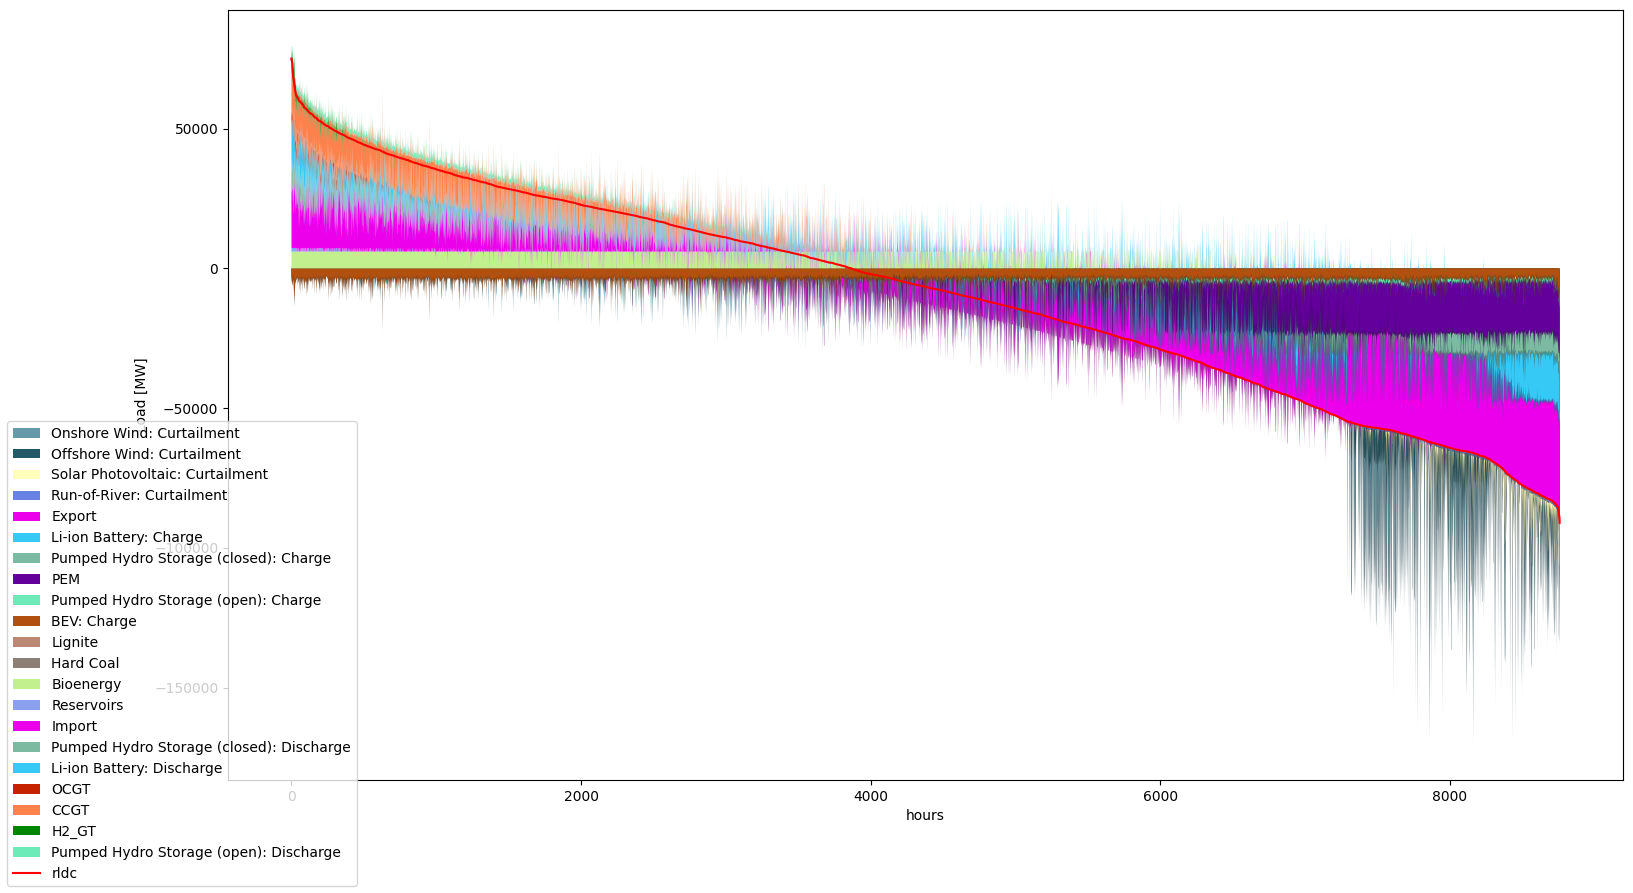

In [10]:
var = datas.query(cases[0])
df = var.to_pandas()
rldc_df = df[df['name'] == 'rldc'].copy()
rldc_df = rldc_df.sort_values('value', ascending=False)
h_order = {h: i for i, h in enumerate(rldc_df['h'])}
df.drop(['id', 'n'], axis=1, inplace=True)
df.set_index(['h','name'], inplace=True)
df = df.unstack()['value']
df.sort_values('h', key=lambda x: x.map(h_order), inplace=True)
ch = df.loc[:, (df != 0).any(axis=0)]
ch.reset_index(drop=True, inplace=True)
fig = helpers.plot_rldc(ch, ordered_tech_color, tech_map=tech_mapping)

Inflow:Nuclear is not in data.
Inflow:Fossil Fuel Other is not in data.
Inflow:Oil Fuel is not in data.
Inflow:V2G is not in data.


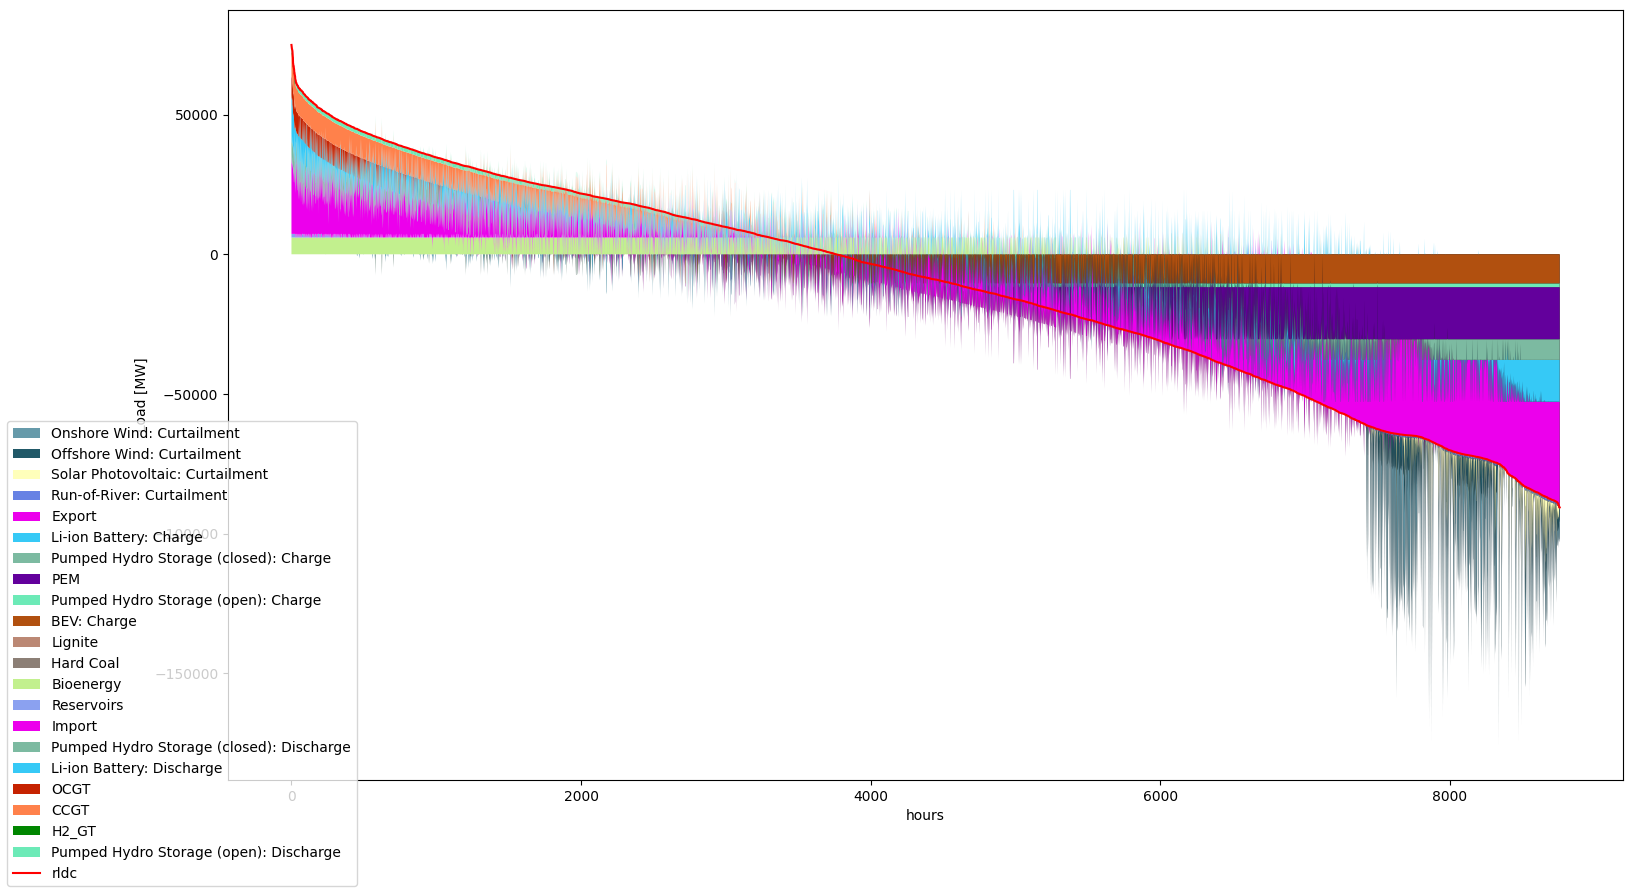

In [11]:
var = datas.query(cases[1])
df = var.to_pandas()
rldc_df = df[df['name'] == 'rldc'].copy()
rldc_df = rldc_df.sort_values('value', ascending=False)
h_order = {h: i for i, h in enumerate(rldc_df['h'])}
df.drop(['id', 'n'], axis=1, inplace=True)
df.set_index(['h','name'], inplace=True)
df = df.unstack()['value']
df.sort_values('h', key=lambda x: x.map(h_order), inplace=True)
ch = df.loc[:, (df != 0).any(axis=0)]
ch.reset_index(drop=True, inplace=True)
fig = helpers.plot_rldc(ch, ordered_tech_color, tech_map=tech_mapping)

Inflow:Nuclear is not in data.
Inflow:Fossil Fuel Other is not in data.
Inflow:Oil Fuel is not in data.


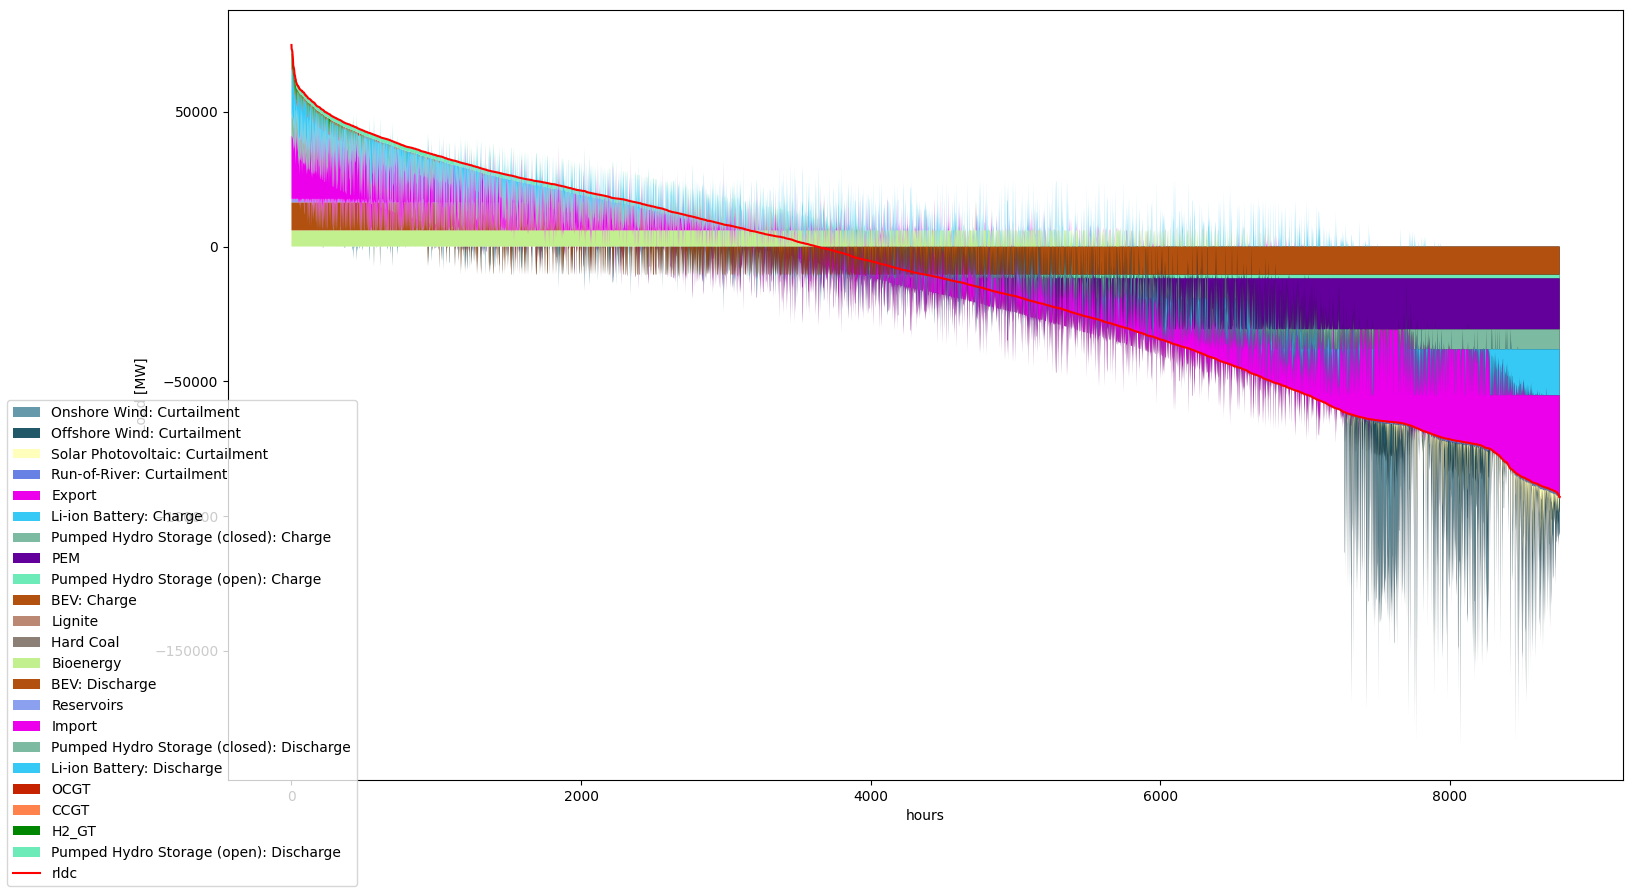

In [12]:
var = datas.query(cases[2])
df = var.to_pandas()
rldc_df = df[df['name'] == 'rldc'].copy()
rldc_df = rldc_df.sort_values('value', ascending=False)
h_order = {h: i for i, h in enumerate(rldc_df['h'])}
df.drop(['id', 'n'], axis=1, inplace=True)
df.set_index(['h','name'], inplace=True)
df = df.unstack()['value']
df.sort_values('h', key=lambda x: x.map(h_order), inplace=True)
ch = df.loc[:, (df != 0).any(axis=0)]
ch.reset_index(drop=True, inplace=True)
fig = helpers.plot_rldc(ch, ordered_tech_color, tech_map=tech_mapping)

Inflow:Nuclear is not in data.
Inflow:Fossil Fuel Other is not in data.
Inflow:Oil Fuel is not in data.


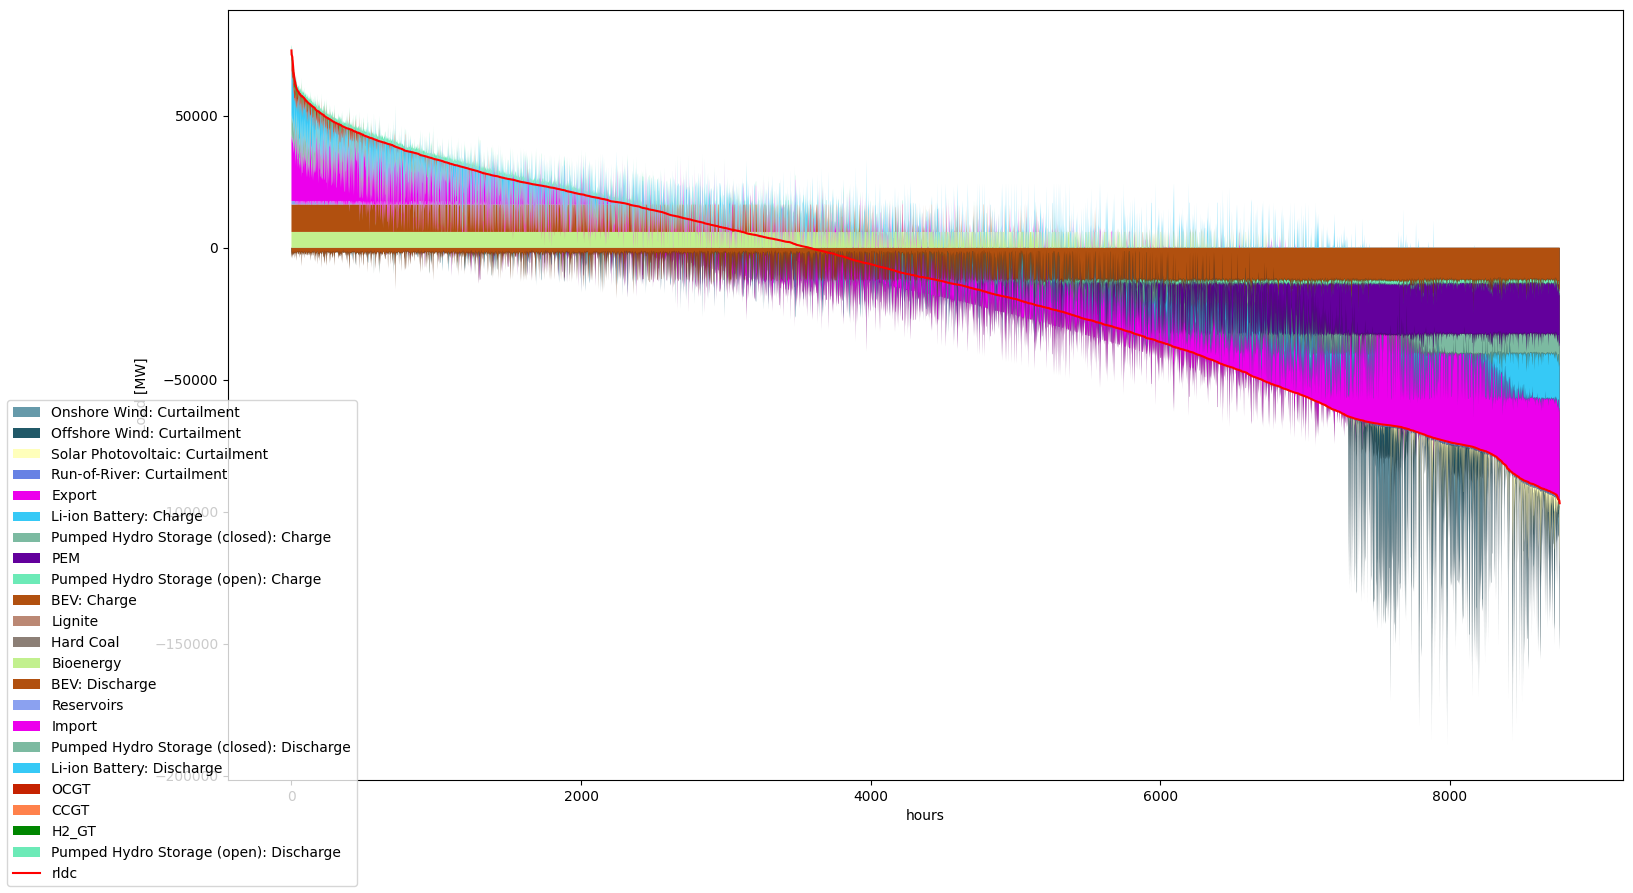

In [13]:
var = datas.query(cases[3])
df = var.to_pandas()
rldc_df = df[df['name'] == 'rldc'].copy()
rldc_df = rldc_df.sort_values('value', ascending=False)
h_order = {h: i for i, h in enumerate(rldc_df['h'])}
df.drop(['id', 'n'], axis=1, inplace=True)
df.set_index(['h','name'], inplace=True)
df = df.unstack()['value']
df.sort_values('h', key=lambda x: x.map(h_order), inplace=True)
ch = df.loc[:, (df != 0).any(axis=0)]
ch.reset_index(drop=True, inplace=True)
fig = helpers.plot_rldc(ch, ordered_tech_color, tech_map=tech_mapping)